In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [4]:
dataset=pd.read_csv('Two_points_KNN.csv' ,names=['Field1', 'Field2','Class'])
df = pd.DataFrame(dataset)
df.head()

Field1     Field2  Class
0 -2.543456 -10.816358      0
1  9.434466  -2.572000      0
2  3.368646 -10.194671      0
3  1.341407  -4.204140      0
4  9.547758  -2.220580      0

In [7]:
x = dataset.iloc[:,:2].values
y = dataset.iloc[:,2].values


print(x[:5])
print(y[:5])

[[ -2.54345625 -10.81635752]
 [  9.43446606  -2.57200001]
 [  3.36864566 -10.19467054]
 [  1.34140667  -4.20414019]
 [  9.54775752  -2.22057988]]
[0 0 0 0 0]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
predictions=knn.predict(x_test)

In [22]:
confusion_matrix(y_test, predictions)

array([[250,   0],
       [  0, 250]], dtype=int64)

In [23]:
knn.score(x_test, y_test)

1.0

In [24]:
precision_score(y_test, predictions)

1.0

In [25]:
recall_score(y_test, predictions)

1.0

In [26]:
f1_score(y_test, predictions)

1.0

In [27]:
y_prediction_prob = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_prob)

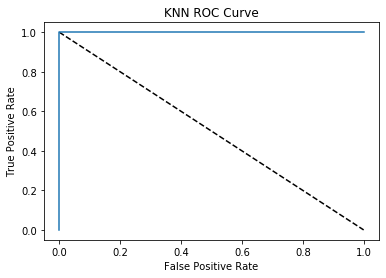

In [28]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()